In [117]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
import numpy as np
from scipy.stats import linregress
from matplotlib import cm as cm

# Study data files
Lifestyle_data = "../Row-2-Group-Project/cdc_npao.csv"
Incidence_data = "../Row-2-Group-Project/Added_final_combined_cancer_data.csv"

# Read CSV
raw_data = pd.read_csv(Lifestyle_data)
cancer_data = pd.read_csv(Incidence_data)


#Cleanup of LifeStyle Data
raw_data_df = pd.DataFrame(raw_data).rename(columns = {'YearStart':"Year", 'LocationDesc':"State", "Data_Value":"Percentage", "Class":"Category"})
del raw_data_df['YearEnd']
del raw_data_df['LocationAbbr']
del raw_data_df['Datasource']
del raw_data_df['Topic']
del raw_data_df['Data_Value_Unit']
del raw_data_df['Data_Value_Type']
del raw_data_df['Data_Value_Alt']
del raw_data_df['Data_Value_Footnote_Symbol']
del raw_data_df['Data_Value_Footnote']
del raw_data_df['Low_Confidence_Limit']
del raw_data_df['High_Confidence_Limit ']
del raw_data_df['Education']
del raw_data_df['Gender']
del raw_data_df['Income']
del raw_data_df['Race/Ethnicity']
del raw_data_df['GeoLocation']
del raw_data_df['ClassID']
del raw_data_df['TopicID']
del raw_data_df['Sample_Size']
del raw_data_df['Total']
del raw_data_df['Age(years)']
del raw_data_df['QuestionID']
del raw_data_df['DataValueTypeID']
del raw_data_df['LocationID']
del raw_data_df['StratificationCategoryId1']
del raw_data_df['StratificationCategory1']
del raw_data_df['Stratification1']
del raw_data_df['StratificationID1']
raw_data_df

# Merge our two data frames together
combined_data = pd.merge(raw_data_df, cancer_data, on="State")
combined_data=combined_data.dropna()

combined_data.head()



,Year,State,Category,Question,Percentage,Incidence Rate,Average Annual Count_x,Death Rate,Average Annual Count_y,Cancer Death_per_hundred_cancer_patient
0,2011,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,32.0,452.0,26110.0,179.0,10332.0,40.0
1,2011,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,32.3,452.0,26110.0,179.0,10332.0,40.0
2,2011,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,31.8,452.0,26110.0,179.0,10332.0,40.0
3,2011,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,33.6,452.0,26110.0,179.0,10332.0,40.0
4,2011,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,32.8,452.0,26110.0,179.0,10332.0,40.0


In [133]:
#Creating a dataframe to gather data for bar chart
years_selected = combined_data["Year"].isin(['2012','2013','2014','2015','2016'])

#get physical activity data
cat_physical_chosen= raw_data_df["Category"].isin(['Physical Activity'])
filter_physical_data = combined_data[years_selected&cat_physical_chosen]
grouped_physical_data = filter_physical_data.groupby(["State",])
Avg_physical_Percent = (grouped_physical_data["Percentage"]).mean()

#get obesity data
cat_obesity_chosen= raw_data_df["Category"].isin(['Obesity / Weight Status'])
filter_obesity_data = combined_data[years_selected&cat_obesity_chosen]
grouped_obesity_data = filter_obesity_data.groupby(["State",])
Avg_obesity_Percent = (grouped_obesity_data["Percentage"]).mean()

#get nutrition data
cat_nutrition_chosen= raw_data_df["Category"].isin(['Fruits and Vegetables'])
filter_nutrition_data = combined_data[years_selected&cat_nutrition_chosen]
grouped_nutrition_data = filter_nutrition_data.groupby(["State",])
Avg_nutrition_Percent = (grouped_nutrition_data["Percentage"]).mean()


#Setting up the dataframe
cat_data = pd.DataFrame({"Physical Activity":Avg_physical_Percent,
                        "Obesity / Weight Status":Avg_obesity_Percent,
                        "Fruits and Vegetables":Avg_nutrition_Percent})

cat_data.fillna(0).head()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


,Physical Activity,Obesity / Weight Status,Fruits and Vegetables
Alabama,30.043060,34.148804,32.104040
Alaska,31.456774,34.737321,29.698077
Arizona,31.108571,31.909524,30.416667
Arkansas,31.844257,31.822772,36.463725
California,29.066456,31.045872,33.378095


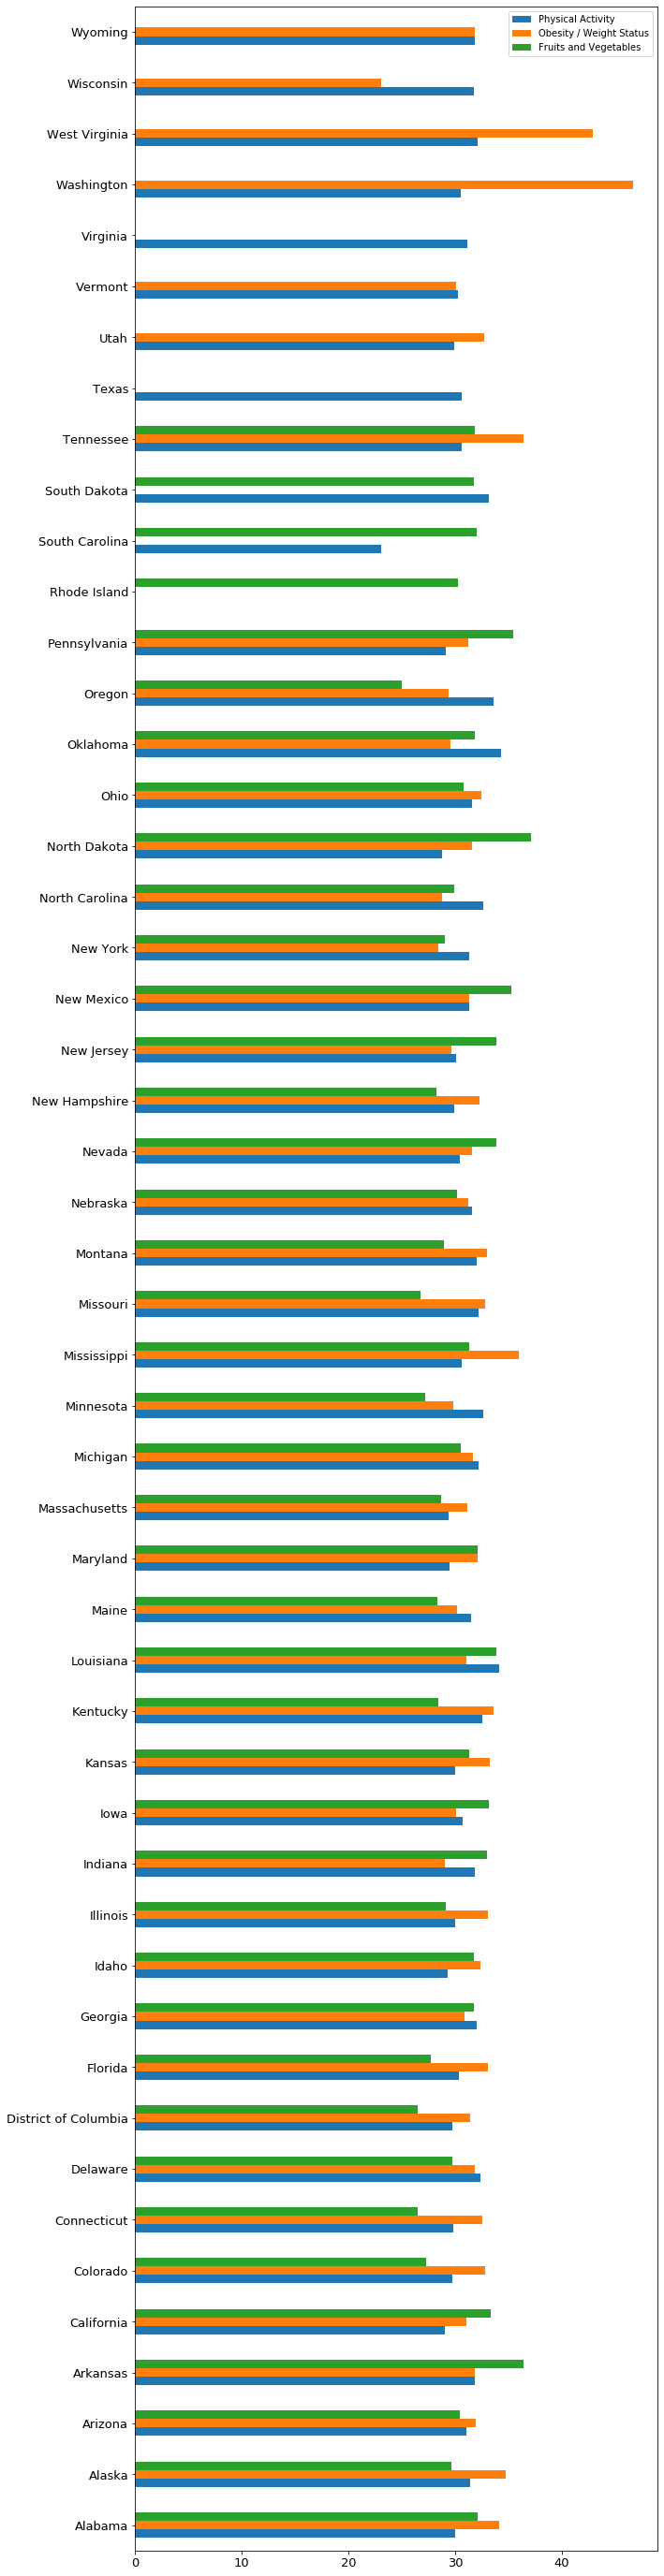

In [129]:
#plotting the bar graph
ax = cat_data.plot(kind='barh' ,figsize=(10,50), fontsize=13);



In [130]:
#Creating a dataframe to gather data to see correlations
Incidence_rate = combined_data.groupby(["State"])["Incidence Rate"].mean()

corr_cat_data = pd.DataFrame({"Physical Activity":Avg_physical_Percent,
                        "Obesity / Weight Status":Avg_obesity_Percent,
                        "Fruits and Vegetables" :Avg_nutrition_Percent,
                        "Incidence Rate": Incidence_rate})

corr_cat_data.dropna().head()

,Physical Activity,Obesity / Weight Status,Fruits and Vegetables,Incidence Rate
Alabama,30.043060,34.148804,32.104040,452.0
Alaska,31.456774,34.737321,29.698077,413.0
Arizona,31.108571,31.909524,30.416667,387.0
Arkansas,31.844257,31.822772,36.463725,468.0
California,29.066456,31.045872,33.378095,405.0


In [152]:
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)
corr = corr_cat_data.corr()

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\


,Physical Activity,Obesity / Weight Status,Fruits and Vegetables,Incidence Rate
Physical Activity,1,-0.147854,-0.175277,0.121382
Obesity / Weight Status,-0.147854,1,-0.0528625,-0.00567321
Fruits and Vegetables,-0.175277,-0.0528625,1,-0.06777
Incidence Rate,0.121382,-0.00567321,-0.06777,1


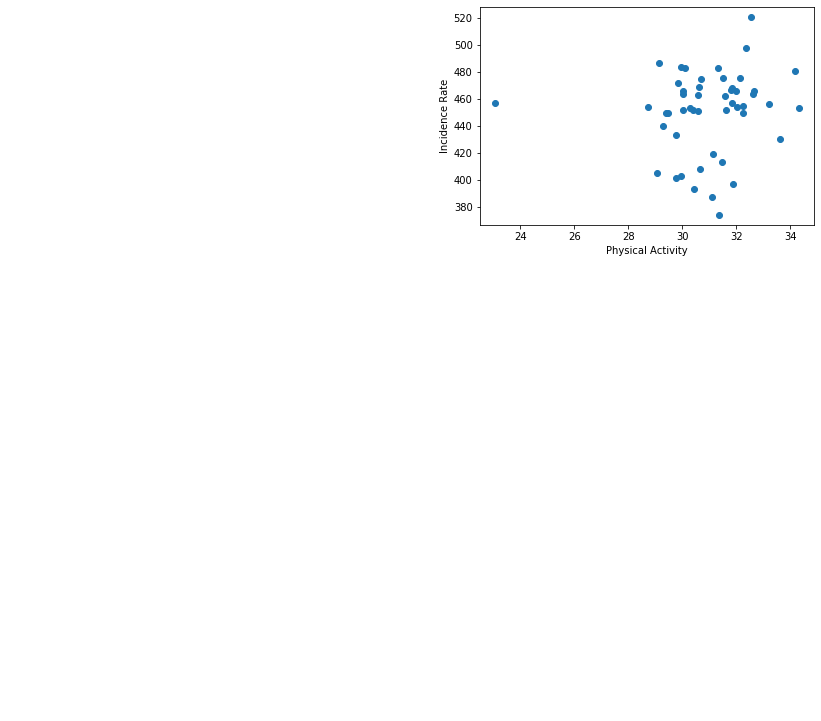

In [148]:
x_values = cat_data["Physical Activity"]
y_values = corr_cat_data["Incidence Rate"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,5),fontsize=15,color="red")
plt.xlabel('Physical Activity')
plt.ylabel('Incidence Rate')

plt.show()



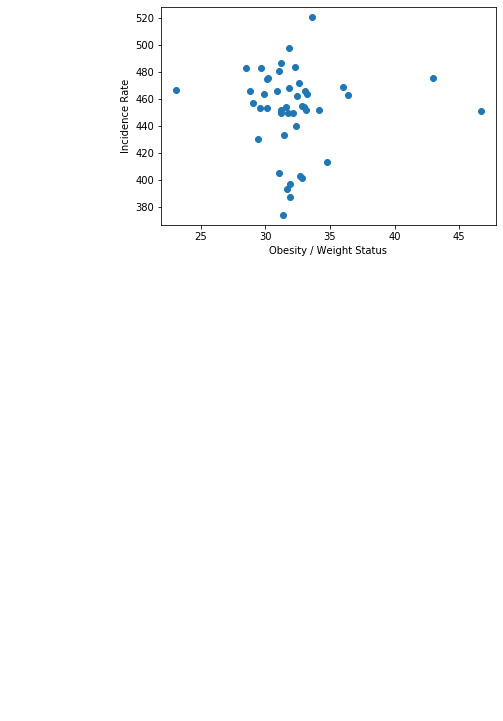

In [153]:
x_values = cat_data["Obesity / Weight Status"]
y_values = corr_cat_data["Incidence Rate"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,5),fontsize=15,color="red")
plt.xlabel('Obesity / Weight Status')
plt.ylabel('Incidence Rate')

plt.show()



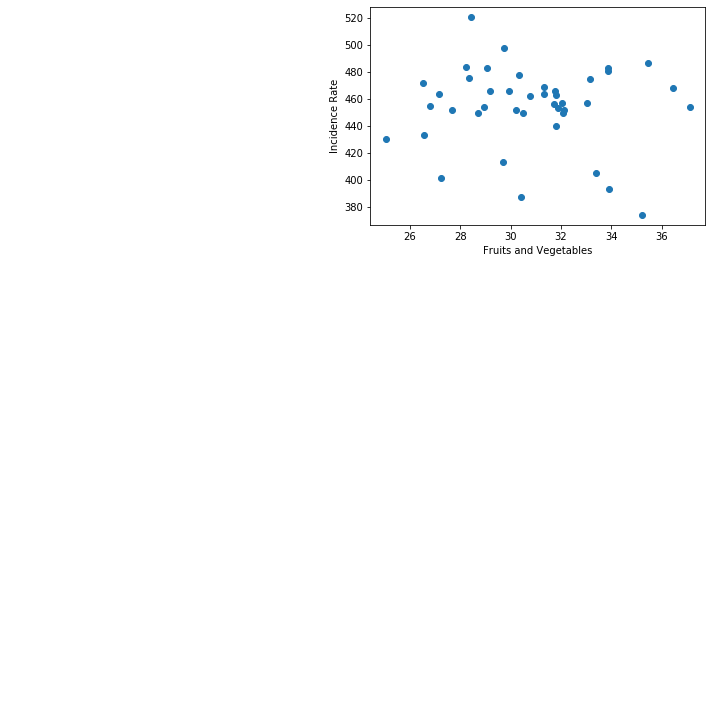

In [154]:
x_values = cat_data["Fruits and Vegetables"]
y_values = corr_cat_data["Incidence Rate"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,5),fontsize=15,color="red")
plt.xlabel('Fruits and Vegetables')
plt.ylabel('Incidence Rate')

plt.show()


